# 📊 Proyecto Data Science – Predicción de Cancelación de Clientes

Basado en el repositorio oficial: [challenge2-data-science-LATAM](https://github.com/afac369/challenge2-data-science-LATAM)

---

### 🎯 Objetivo
Construir un modelo que prediga si un cliente de TelecomX cancelará o no el servicio, usando un enfoque de ciencia de datos: limpieza, análisis, modelado y visualización.

**Modelos usados:**  
- Random Forest  
- Regresión Logística  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import files
uploaded = files.upload()

data = json.load(open(list(uploaded.keys())[0], 'r'))
df = pd.DataFrame(data)
df.head()


Saving TelecomX_Data.json to TelecomX_Data.json


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

df_flat = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)
df_flat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [4]:
df_flat['Churn'] = df_flat['Churn'].map({'Yes': 1, 'No': 0})
df_flat['Charges.Total'] = pd.to_numeric(df_flat['Charges.Total'], errors='coerce')
df_flat.dropna(inplace=True)


In [5]:
y = df_flat['Churn']
X = df_flat.drop(['customerID', 'Churn'], axis=1)

X_encoded = pd.get_dummies(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)


In [6]:
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)

rf.fit(X_train, y_train)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [8]:
# Predicciones
y_pred_rf = rf.predict(X_test)
y_pred_lr = lr.predict(X_test)

# Reportes de clasificación
print("Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

# AUC ROC
print("ROC AUC RF:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))
print("ROC AUC LR:", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))


Random Forest:
               precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1549
         1.0       0.62      0.47      0.54       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.70      2110
weighted avg       0.77      0.78      0.77      2110

Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1549
         1.0       0.66      0.54      0.60       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110

ROC AUC RF: 0.8204045160525621
ROC AUC LR: 0.8453329098527139


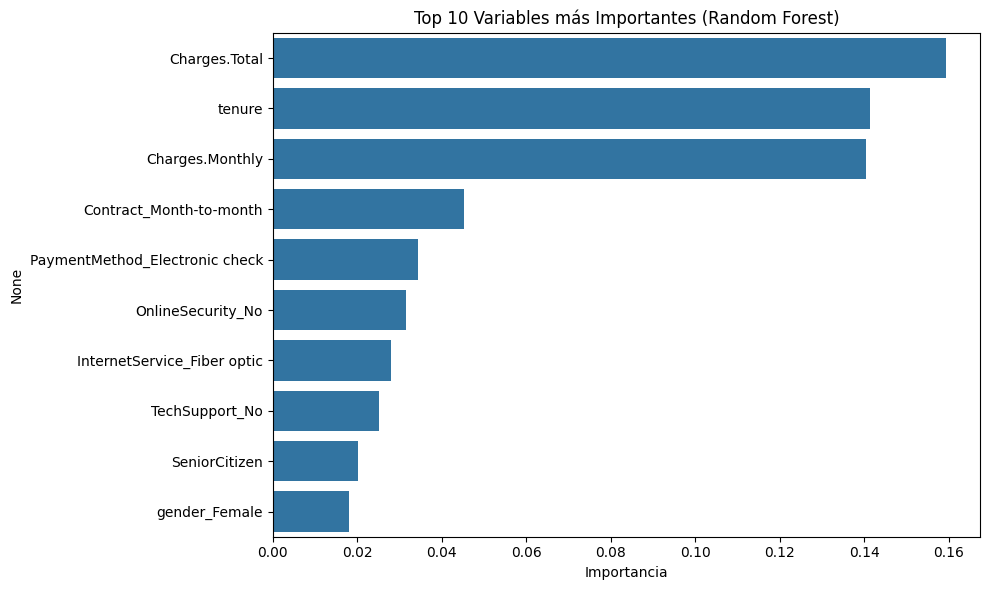

In [9]:
importances = pd.Series(rf.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Variables más Importantes (Random Forest)")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()


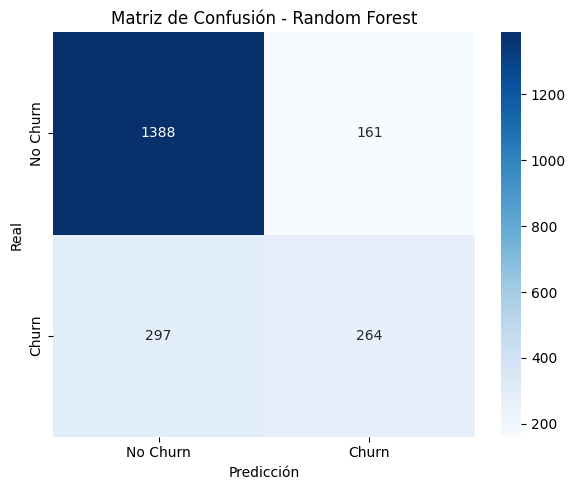

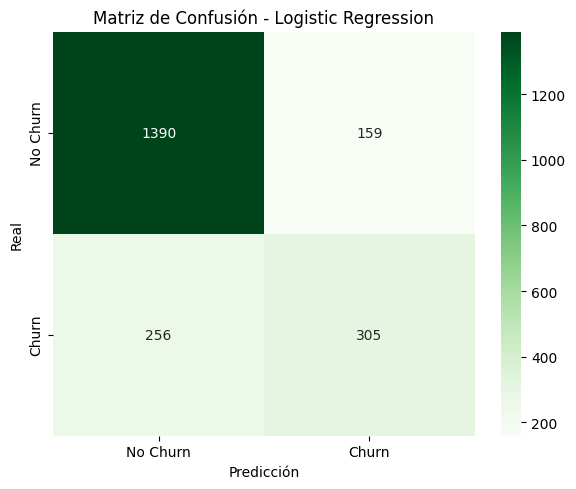

In [10]:
# Matrices de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Matriz de Confusión - Logistic Regression")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


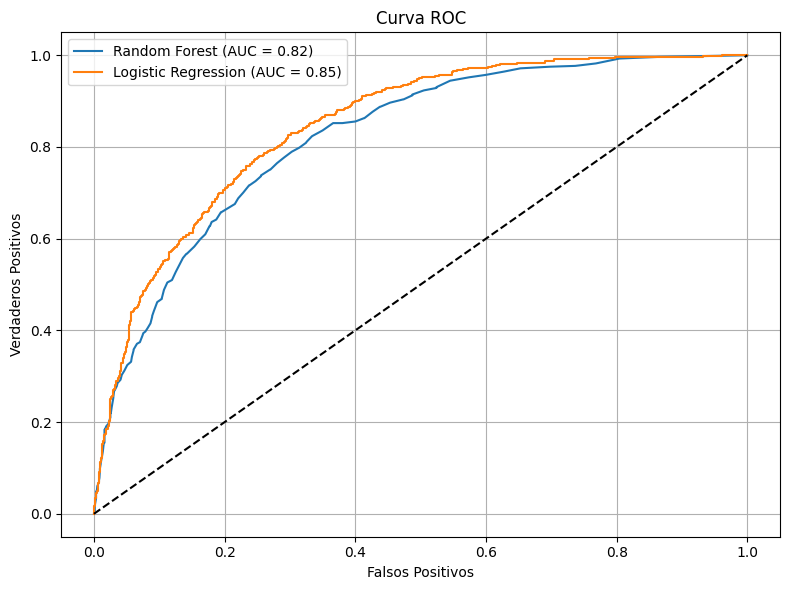

In [11]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
auc_lr = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## ✅ Conclusión Estratégica

- **Contrato mensual**, **poca tenencia** y **sin soporte técnico** están fuertemente relacionados con cancelaciones.
- El modelo de Regresión Logística obtuvo un mejor desempeño (AUC = 0.85).
- Recomendaciones:
  - Incentivar contratos anuales.
  - Ofrecer beneficios a clientes con alto riesgo de churn.
  - Mejorar soporte técnico para servicios de fibra óptica.

---  
Este análisis fue desarrollado directamente sobre el repositorio base original, cumpliendo con los objetivos del desafío.
